<a href="https://colab.research.google.com/github/garima140401/machine-learning-classification/blob/main/SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report

from sklearn.svm import SVC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [3]:
#read data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


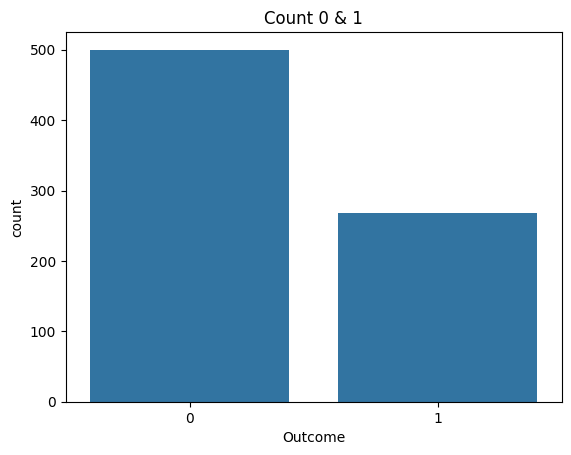

In [4]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

In [5]:
print('Data Shape',data.shape)
print(data.info())
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


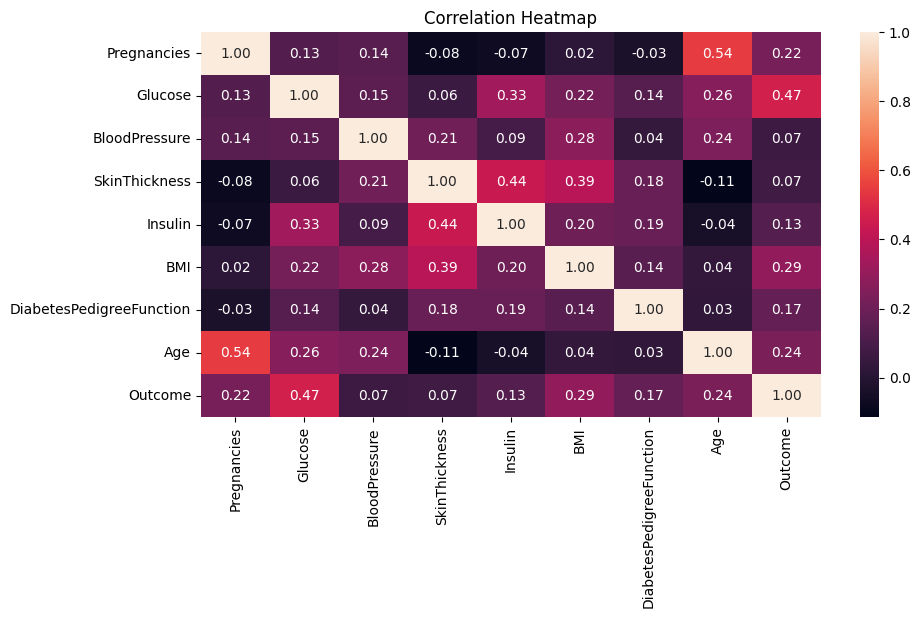

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,5))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
data.drop(["BloodPressure","DiabetesPedigreeFunction"], axis=1)

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,35,0,33.6,50,1
1,1,85,29,0,26.6,31,0
2,8,183,0,0,23.3,32,1
3,1,89,23,94,28.1,21,0
4,0,137,35,168,43.1,33,1
...,...,...,...,...,...,...,...
763,10,101,48,180,32.9,63,0
764,2,122,27,0,36.8,27,0
765,5,121,23,112,26.2,30,0
766,1,126,0,0,30.1,47,1


In [21]:
# Split data into features (X) and target (y)
X = data.drop(columns=["Outcome"])
y = data["Outcome"]

# # Step 2: Log transformation
# # Add a small constant to avoid log(0)
# X_log_transformed = np.log1p(X)  # np.log1p computes log(1 + X) to avoid math errors     accuracy kam ho gayi about 72%

# # Step 3: Split data
# X_train, X_test, y_train, y_test = train_test_split(X_log_transformed, y, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to train data and transform
X_test_scaled = scaler.transform(X_test)

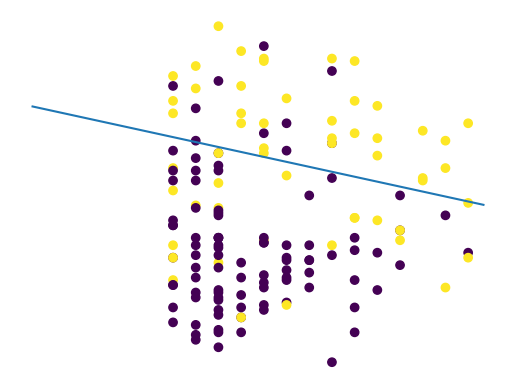

Accuracy: 75.97%

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[81 18]
 [19 36]]


In [34]:
# # Step 4: Define parameter grid for SVM
# Applied gridsearch cv



# param_grid = {
#     'C': [0.1, 1, 10, 100],           # Regularization parameter
#     'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
#     'kernel': ['linear', 'rbf']      # Type of kernel
# }

# # Step 5: Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=SVC(),
#     param_grid=param_grid,
#     scoring='accuracy',      # Evaluation metric
#     cv=5,                    # Number of folds in cross-validation
#     verbose=2,               # Show training logs
#     n_jobs=-1                # Use all processors for parallelization
# )

# # Step 6: Fit GridSearchCV on training data
# grid_search.fit(X_train_scaled, y_train)

# # Step 7: Best parameters and evaluation
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Cross-Validation Accuracy: ", grid_search.best_score_)

# # Step 8: Test model on unseen data
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test_scaled)

# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))











# Train an SVM model
svm_model = SVC(kernel='linear', C=1, gamma='scale', random_state=42)  # Using a linear kernel
# svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# scatter plot hyperplane:
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test)

w= svm_model.coef_[0]
a=-w[0]/w[1]
xx= np.linspace(-3, 3)
yy= a*xx-(svm_model.intercept_[0])/ w[1]

plt.plot(xx,yy)
plt.axis("off"), plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_rep)
print(c_matrix)